In [1]:
api_key = "4b362c42052d41a7a8541e6f350b1004"

In [3]:
import requests
import json

def get_news(query):
    url = f"https://newsapi.org/v2/everything?q={query}&apiKey={api_key}"
    response = requests.get(url)
    return json.loads(response.text)

query = "ucraina"
news = get_news(query)
# print(json.dumps(news, indent=2))

KeyError: 0

In [6]:
news.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [15]:
news["articles"][0].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [1]:
def news_get(keyword):
    import feedparser
    import newspaper
    
    if not keyword:
        keyword="Vuoto"

    # GOOGLE_RSS_URL="https://news.google.com/rss?hl=it&gl=IT&ceid=IT:it"
    # NewsFeed = feedparser.parse(GOOGLE_RSS_URL)
    
    GOOGLE_RSS_KEYWORD_LOCALIZATION="https://news.google.com/rss/search?q=<KEYWORD>&hl=<LANGUAGE_CODE>&gl=<COUNTRY_CODE>&ceid=<COUNTRY_CODE>:<LANGUAGE_CODE>"

    # NewsFeed = feedparser.parse(GOOGLE_RSS_KEYWORD_LOCALIZATION.replace(
    # "<LANGUAGE_CODE>","It").replace(
    #     "<COUNTRY_CODE>","It").replace(
    #         "<KEYWORD>",str(keyword)))
    
    NewsFeed = feedparser.parse("https://www.comune.padova.it/rss/notizie.xml")
    

    # NewsFeed = feedparser.parse(GOOGLE_RSS_KEYWORD_LOCALIZATION.replace("<KEYWORD>",keyword))
    # newss=[i for i in NewsFeed.entries]
    newss=[]
    # print(NewsFeed.entries[0]["links"][0]["href"])
    for newsItem in NewsFeed.entries:
        article=newspaper.Article(url=newsItem["link"])
        print()
        try:
            article.download()
            article.parse()
            # print(article.is_parsed())
            
            # print(article.is_parsed())
            # print(article.title)
            # print(article.parse())
            
            newss.append(
                        {"titolo":article.title,
                          "autori":article.authors,
                          "testata_giornalistica":newsItem.source["title"],
                          "data_di_pubblicazione":article.publish_date,
                          "link":newsItem["link"],
                          "testo":article.text, 
                          "img_url":article.top_image}
                         )
        except:
            pass

        # print(article.title+"\n"+article.text+"\n"+str(article.publish_date)+"\n"+"\n -----Nuovo Articolo------ \n")
        print(len(newss))
        if len(newss)>10:
            return newss

In [5]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_dat

True

In [14]:
import requests
import json

API_KEY = "4b362c42052d41a7a8541e6f350b1004"


def news_get(keyword):
    url = f"https://newsapi.org/v2/everything?language=it&q={keyword}&apiKey={API_KEY}"
    response = requests.get(url)
    return json.loads(response.text)["articles"]


In [15]:
import regex as re
query = "ucraina"
text = news_get(query)
testo_completo=""
for article in text:
    testo_completo+=article["content"]
    testo_completo+=article["title"]

testo_completo = re.sub("\[([^\]]+)\]"," ",testo_completo)
testo_completo 
# testo_completo.replace("\[([^\]]+)\]"," ")

'"Dobbiamo distruggere il potere militare del nemico e lo distruggeremo. A Belogorivka, Maryinka, Avdiivka, Bakhmut, Vuhledar e Kamianka si sta decidendo quale sarà il nostro futuro. Qui si combatte p…  Guerra Ucraina - Russia, le news di oggi. Zelensky: "Oltre 170mila km quadrati Paese coperti da mine". Parolin: "Santa Sede sta dando fondo a sua creatività diplomatica"La tensione nei cieli d\'Europa non si allenta. Dopo l\'incidente che ha portato alla distruzione di un drone americano sul Mar Nero, velivoli russi e della Nato si sono incrociati anche oggi. Due cacc…  Guerra Ucraina - Russia, le news di oggi. Media: "Israele approva licenze per vendita sistemi antidrone a Kiev"Le forze militari ucraine hanno distrutto due basi militari russe a Melitopol, uccidendo centinaia di soldati occupanti. Lo ha dichiarato il sindaco della città, Ivan Fedorov. "Due potenti esplosioni…  Guerra Ucraina - Russia, le news di oggi: distrutte due basi militari russe a MelitopolCresce la tensione tra U

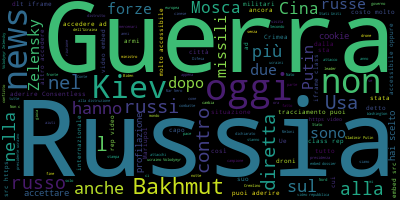

In [17]:
import wordcloud
import nltk

text = testo_completo
text = nltk.word_tokenize(text, language="italian")
result = nltk.pos_tag(text)

new_text = ' '.join([word for word, tag in result if tag[0] in "NJV"])

stopwords = set(wordcloud.STOPWORDS)
stopwords.update([query,"si","al","dal","ha","è","e","un","una","uno","che","il", "lo", "la", "i", "gli", "le", "di", "da", "del", "dello", "della", "dei", "degli", "delle", "in", "a", "con", "su", "per", "tra", "fra"])

modello = wordcloud.WordCloud(stopwords=stopwords).generate(new_text)
# modello.to_file("nuvola.png")
modello.to_image()